In [16]:
import numpy as np
import pandas as pd

Using pandas importing the placement dataset.

In [17]:
df = pd.read_csv('/content/placement.csv')

To get the overview of the data set imported we use .head() command

In [18]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


To get the dimension of the table .shape is used (rows,col)

In [19]:
df.shape

(100, 4)

.info() is used to see if any columns has missing values?

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


#  **Step 1: Preprocessing**
we have to just remove the extra column "Unnamed".

In [21]:
df = df.iloc[:,1:]     #[all rows, all columns starting from 1]

In [22]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# **Step 2: EDA (Exploratory Data Analysis)**

In [23]:
import matplotlib.pyplot as plt


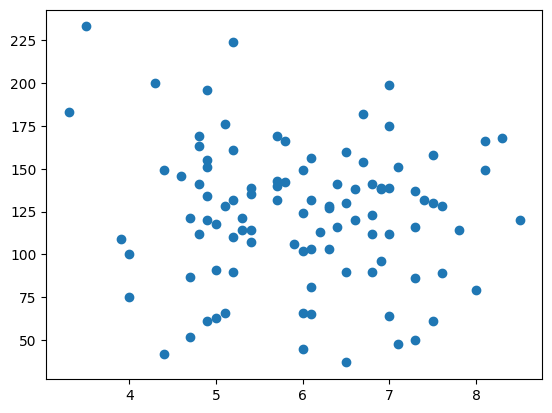

In [24]:
plt.scatter(df['cgpa'],df['iq'])     #scatter plot (df[x],df[y])

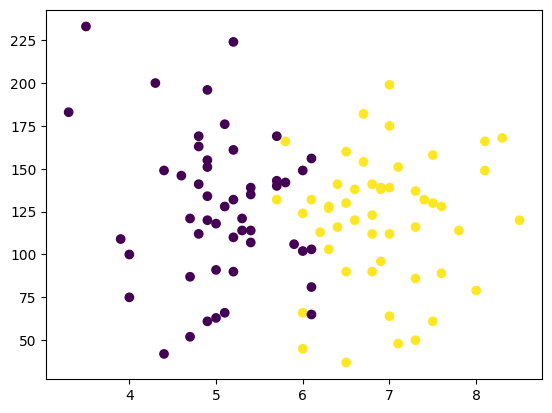

In [25]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement']) #This will color those points who got placement

# **Step 3: Feature Selection**
Here cgpa and iq column will be the features

# **Step 4: Extract the input and output column**
cgpa and iq is an independent variable

placement is a dependent variable

In [26]:
x = df.iloc[:,0:2] #[all rows, 0th and 1st column]
y = df.iloc[:,-1] #[all rows, last column]

In [29]:
x.shape

(100, 2)

In [30]:
y.shape


(100,)

# **Step 5: Train Test Split**

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)
 # 3 parameters (independent variable, dependent variable, test_data_size(0.1-->10%))


In [34]:
x_train

,cgpa,iq
69,8.5,120.0
41,5.4,114.0
65,8.1,166.0
79,6.5,90.0
17,3.3,183.0
...,...,...
30,7.6,128.0
90,7.3,86.0
49,5.4,135.0
26,7.0,199.0


In [35]:
x_test

,cgpa,iq
46,5.3,114.0
47,5.2,161.0
61,7.3,137.0
31,3.9,109.0
27,6.0,124.0
84,5.7,169.0
18,4.0,100.0
87,5.7,132.0
52,7.0,175.0
56,6.1,65.0


In [36]:
y_train

,placement
69,1
41,0
65,1
79,1
17,0
...,...
30,1
90,1
49,0
26,1


In [37]:
y_test

,placement
46,0
47,0
61,1
31,0
27,1
84,0
18,0
87,1
52,1
56,0


# **Step 6: Scaling the data**
This would change the values in between -1 to 1

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
x_train = scaler.fit_transform(x_train)

In [50]:
x_train

array([[ 2.16460117e+00, -7.47094995e-02],
       [-5.54551133e-01, -2.23029829e-01],
       [ 1.81374281e+00,  1.06241303e+00],
       [ 4.10309362e-01, -8.16311149e-01],
       [-2.39655753e+00,  1.48265396e+00],
       [ 9.36596905e-01,  6.91612205e-01],
       [ 1.28745527e+00,  1.72491050e-01],
       [-7.29980314e-01,  2.49617622e+00],
       [-2.03692771e-01,  4.69131710e-01],
       [ 4.98023953e-01, -7.47094995e-02],
       [ 1.11202609e+00, -1.73589719e-01],
       [ 1.19974068e+00,  2.21931160e-01],
       [-1.78255540e+00, -1.18711197e+00],
       [ 6.73453134e-01, -5.49334555e-04],
       [ 3.22594772e-01,  4.44411655e-01],
       [ 1.37516986e+00, -8.41031204e-01],
       [ 8.48882315e-01, -1.45903258e+00],
       [ 8.48882315e-01,  3.94971545e-01],
       [ 4.98023953e-01,  3.70251490e-01],
       [-2.82635903e-02, -1.92871362e+00],
       [ 4.10309362e-01,  9.14092700e-01],
       [-8.17694905e-01,  1.23050940e-01],
       [ 1.55059904e+00, -2.23029829e-01],
       [-9.

In [51]:
x_test = scaler.transform(x_test)

In [52]:
x_test

array([[-0.64226572, -0.22302983],
       [-0.72998031,  0.93881276],
       [ 1.11202609,  0.34553144],
       [-1.87026999, -0.3466301 ],
       [-0.02826359,  0.02417072],
       [-0.29140736,  1.13657319],
       [-1.7825554 , -0.5691106 ],
       [-0.29140736,  0.22193116],
       [ 0.84888231,  1.28489352],
       [ 0.059451  , -1.43431252]])

# **Step 7: Train the model**
Logestic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
clf = LogisticRegression()


In [56]:
clf.fit(x_train,y_train)  #This trains the model

LogisticRegression()

# **Step 8: Evaluation**

In [61]:
pred = clf.predict(x_test)

In [62]:
y_test

,placement
46,0
47,0
61,1
31,0
27,1
84,0
18,0
87,1
52,1
56,0


In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_test,pred)

0.7

# To visualise the decision boundary on the model is predicting

In [65]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

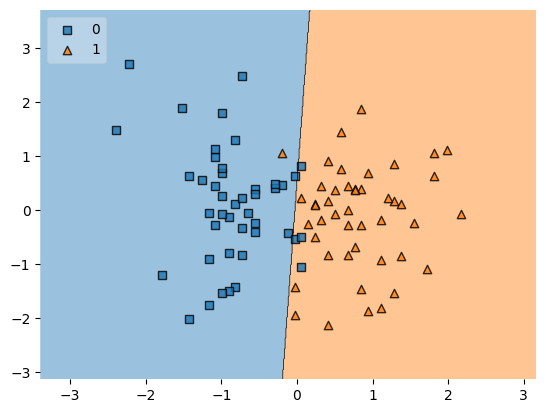

In [66]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

# **Step 9: Downloading the machine learning file**
This step will give you a file which we can deply in our website

In [67]:
import pickle

In [68]:
pickle.dump(clf,open('model.placement','wb')) #(bump what,open('file_name','mode') )